# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('df_dummies.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [5]:
df.isna().sum()

sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Civil marriage     

In [12]:
y = df.mau

In [13]:
X = df.drop('mau',axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [15]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)


array([False, False, False, ..., False, False, False])

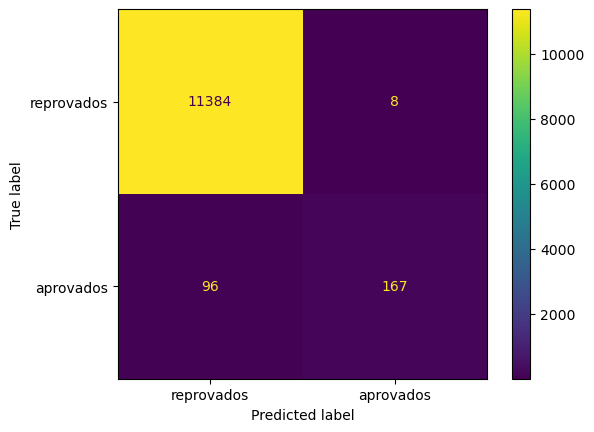

In [24]:
ConfusionMatrixDisplay.from_estimator(clf, X_train,y_train, display_labels=['reprovados', 'aprovados'])
plt.show()

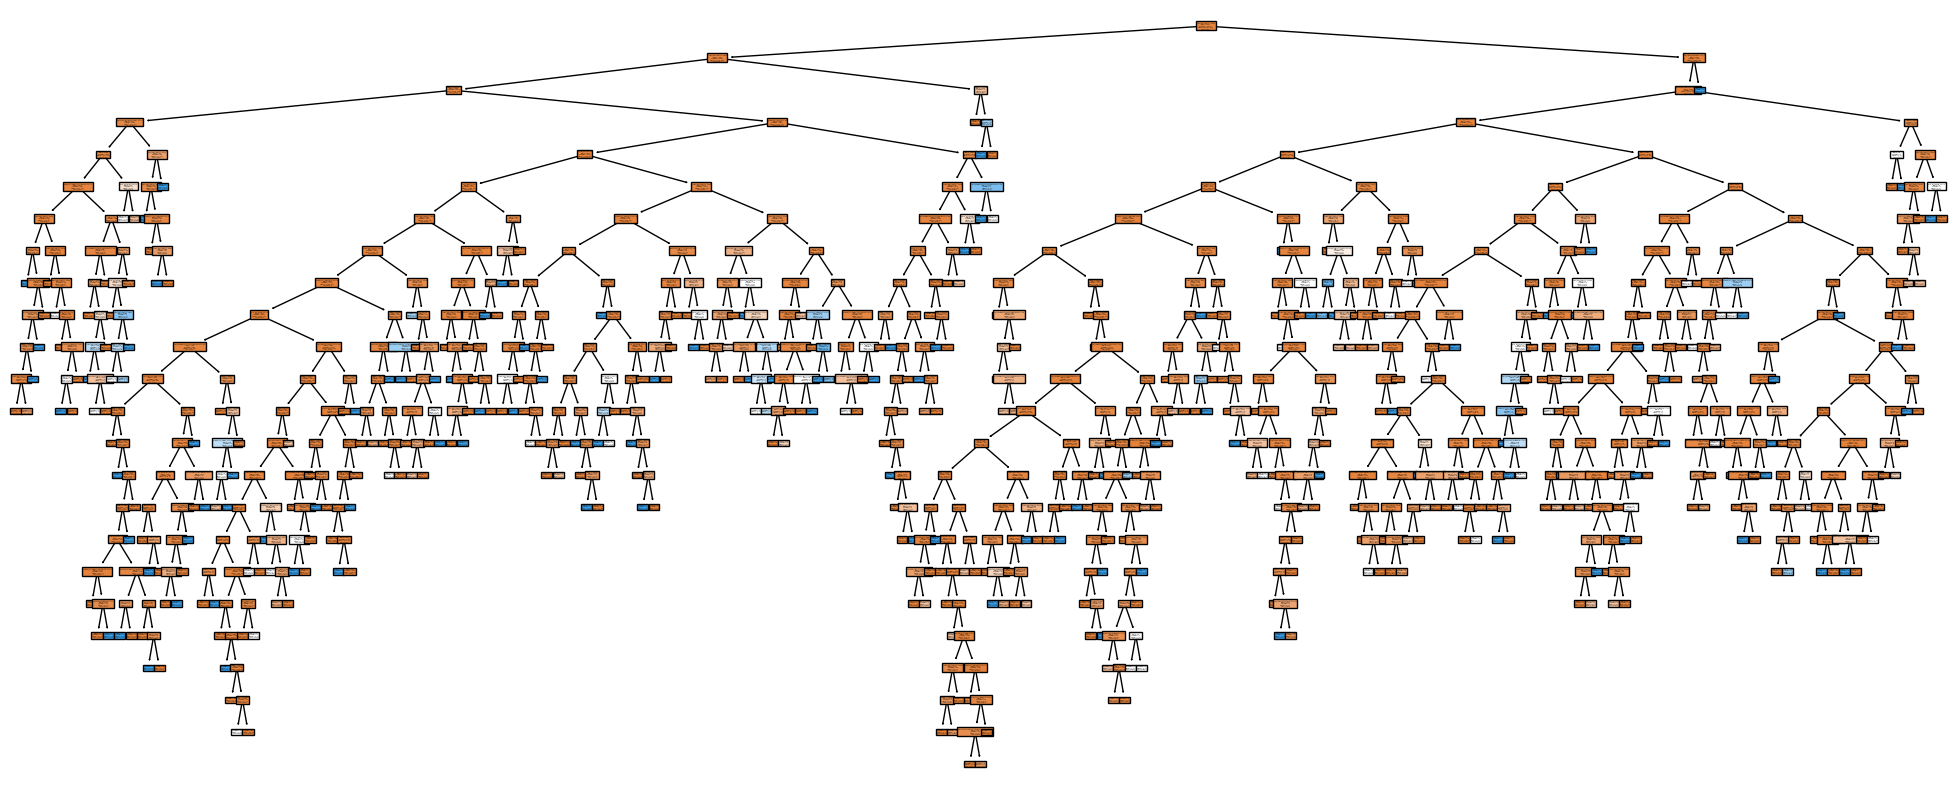

In [23]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Mau', 'Bom'],
          feature_names=X.columns);

In [31]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [33]:
y_pred = clf.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.9693693693693693

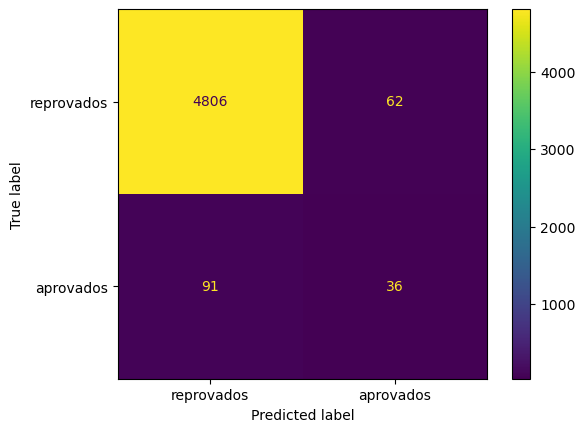

In [32]:
ConfusionMatrixDisplay.from_estimator(clf,  X_test, y_test, display_labels=['reprovados', 'aprovados'])


In [35]:
clf_pron = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_pron = clf_pron.fit(X_train,y_train)
predict = clf_pron.predict(X_test)
accuracy_score(y_test, predict)

0.9727727727727727

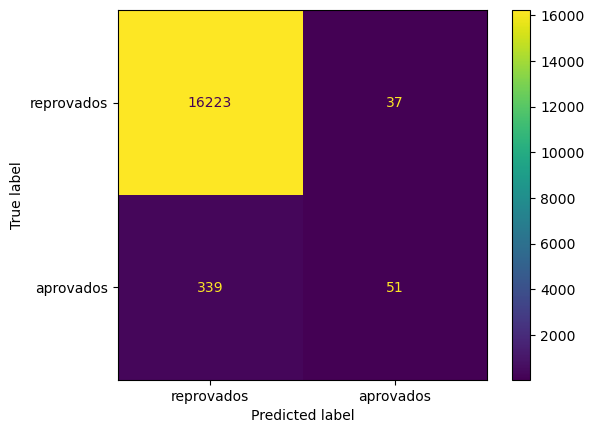

In [37]:
ConfusionMatrixDisplay.from_estimator(clf_pron,  X, y, display_labels=['reprovados', 'aprovados'])


In [39]:
# Criar uma lista com todas as previsões como 'aprovados'
y_pred_all_approved = ['aprovados'] * len(y_train)

# Calcular a acurácia comparando as previsões com os rótulos verdadeiros
accuracy = accuracy_score(y_train, y_pred_all_approved)

print("Acurácia:", accuracy)

Acurácia: 0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
